In [1]:
from binarytoydata import *
from model_training import *
%load_ext autoreload
import pandas as pd
import torch.distributions as dist
import torch
import pandas as pd
import numpy as np
import sklearn

In [2]:
x_expectations.shape[0]

NameError: name 'x_expectations' is not defined

In [50]:
%autoreload 2
num_samples = 10000
z_expectation = torch.Tensor([0.5])
x_expectations = torch.Tensor([[0.9,0.1]])#,
                              #[0.6,0.4]])
t_expectations = torch.Tensor([[0.6,0.2]])
y_expectations = torch.Tensor([[0.1,0.8,0.2,0.92]])
df = binary_data_df(num_samples, z_expectation, x_expectations, t_expectations, y_expectations)

torch.Size([10000, 1])


In [51]:
len(df[(df.z==0) & (df.t == 1)]) / len(df[df.z==0])

0.6086172344689379

In [142]:
BATCH_SIZE = 1000
device = 'cpu'
dataset = BinaryDataset(df)
dataloader = BinaryDataLoader(dataset, validation_split=0.2)
train_loader, test_loader = dataloader.get_loaders(batch_size=BATCH_SIZE)

Training Results - Epoch 1 - PEHE: 0.7512 MAE ATE: -0.7095 y_reconc_loss: 742.4020 x_reconc_loss: 714.3303 t_reconc_loss: 679.4863 kld_loss: 4.0685 total_loss: 2140.2870 learning rate: 0.0089
Validate Results - Epoch 1 - PEHE: 0.7325 MAE ATE: -0.6955 y_reconc_loss: 752.7631 x_reconc_loss: 708.6214 t_reconc_loss: 684.4701 kld_loss: 4.3051 total_loss: 2150.1597 learning rate: 0.0089
Training Results - Epoch 2 - PEHE: 0.7512 MAE ATE: -0.7095 y_reconc_loss: 697.3684 x_reconc_loss: 703.5362 t_reconc_loss: 676.5073 kld_loss: 3.3915 total_loss: 2080.8033 learning rate: 0.0079
Validate Results - Epoch 2 - PEHE: 0.7325 MAE ATE: -0.6955 y_reconc_loss: 709.7912 x_reconc_loss: 704.0575 t_reconc_loss: 680.4072 kld_loss: 3.6267 total_loss: 2097.8826 learning rate: 0.0079
Training Results - Epoch 3 - PEHE: 0.7513 MAE ATE: -0.7095 y_reconc_loss: 664.4968 x_reconc_loss: 695.6342 t_reconc_loss: 673.6365 kld_loss: 3.2436 total_loss: 2037.0111 learning rate: 0.0071
Validate Results - Epoch 3 - PEHE: 0.732

Training Results - Epoch 23 - PEHE: 0.7512 MAE ATE: -0.7095 y_reconc_loss: 509.9652 x_reconc_loss: 690.7469 t_reconc_loss: 672.9968 kld_loss: 2.5675 total_loss: 1876.2764 learning rate: 0.0007
Validate Results - Epoch 23 - PEHE: 0.7325 MAE ATE: -0.6955 y_reconc_loss: 533.5594 x_reconc_loss: 691.8552 t_reconc_loss: 678.9624 kld_loss: 2.5939 total_loss: 1906.9709 learning rate: 0.0007
Training Results - Epoch 24 - PEHE: 0.7512 MAE ATE: -0.7095 y_reconc_loss: 508.9194 x_reconc_loss: 692.9658 t_reconc_loss: 673.8128 kld_loss: 2.6009 total_loss: 1878.2990 learning rate: 0.0006
Validate Results - Epoch 24 - PEHE: 0.7325 MAE ATE: -0.6955 y_reconc_loss: 531.7900 x_reconc_loss: 691.9439 t_reconc_loss: 677.5276 kld_loss: 2.6260 total_loss: 1903.8875 learning rate: 0.0006
Training Results - Epoch 25 - PEHE: 0.7512 MAE ATE: -0.7095 y_reconc_loss: 507.2510 x_reconc_loss: 691.9864 t_reconc_loss: 674.4589 kld_loss: 2.6204 total_loss: 1876.3168 learning rate: 0.0006
Validate Results - Epoch 25 - PEHE:

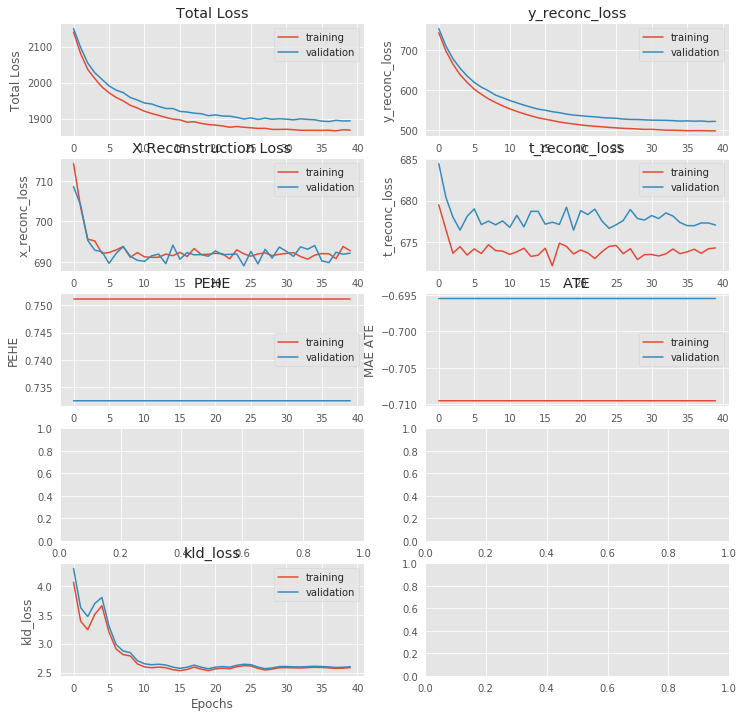

In [146]:
%autoreload 2
model = run_cevae(num_epochs=40, lr_start=0.01, lr_end=0.0001, train_loader=train_loader, test_loader=test_loader, 
          input_dim = 1, z_dim=1, z_mode='binary', x_mode='binary', device=device,
                 encoder_hidden_dim=3, decoder_hidden_dim=1, num_hidden=1)

In [ ]:
#z_sample = dist.Bernoulli(torch.Tensor([0.5])).sample((1000,))
z_sample = torch.randn(1000,1)
t = torch.ones((1000,))
with torch.no_grad():
    xloc, xscale, x_logits, t_logits,y_logits = model.decoder(z_sample,t)

In [ ]:
plt.plot(z_sample, torch.sigmoid(t_logits),'o')

In [ ]:
display(torch.sigmoid(x_logits)[:5])
display(torch.sigmoid(t_logits)[:5])
display(z_sample[:5])

In [147]:
%autoreload 2
zs, xs, ts, ys = model.decoder.sample(20000)

In [148]:
print("Marginal probs according to VAE and according to the data")
for t in range(2):
    for y in range(2):
        for x in range(2):
            probVAE = ((ts==t)&(ys==y)&(xs==x)).double().sum()/len(ts)
            probdata = len(df[(df.t==t)&(df.yf==y)&(df.x0==x)])/len(df)
            print("P(y={},x={},t={})\t={}(VAE)\t={}(data)".format(y,x,t,probVAE,probdata))
for t in range(2):
    for y in range(2):
        probVAE = ((ts==t)&(ys==y)).double().sum()/len(ts)
        probdata = len(df[(df.t==t)&(df.yf==y)])/len(df)
        print("P(y={},t={})\t={}(VAE)\t={}(data)".format(y,t,probVAE,probdata))

Marginal probs according to VAE and according to the data
P(y=0,x=0,t=0)	=0.1947(VAE)	=0.3066(data)
P(y=0,x=1,t=0)	=0.20245(VAE)	=0.1895(data)
P(y=1,x=0,t=0)	=0.10075(VAE)	=0.068(data)
P(y=1,x=1,t=0)	=0.1013(VAE)	=0.0298(data)
P(y=0,x=0,t=1)	=0.04(VAE)	=0.014(data)
P(y=0,x=1,t=1)	=0.03835(VAE)	=0.0571(data)
P(y=1,x=0,t=1)	=0.15675(VAE)	=0.1059(data)
P(y=1,x=1,t=1)	=0.1657(VAE)	=0.2291(data)
P(y=0,t=0)	=0.39715(VAE)	=0.4961(data)
P(y=1,t=0)	=0.20205(VAE)	=0.0978(data)
P(y=0,t=1)	=0.07835(VAE)	=0.0711(data)
P(y=1,t=1)	=0.32245(VAE)	=0.335(data)


In [141]:
print("Conditional probs according to VAE and data")
for z in range(2):
    for t in range(2):
        probVAE = ((ts==t)&(zs==z)).double().sum()/(zs==z).double().sum()
        probdata = len(df[(df.t==t)&(df.z==z)])/len(df[df.z==z])
        print("P(t={}|z={})\t={:.3f}(VAE)\t{:.3f}(data)".format(t,z,probVAE, probdata))
print()
for z in range(2):
    for x in range(2):
        probVAE = ((xs==x)&(zs==z)).double().sum()/(xs==x).double().sum()
        probdata = len(df[(df.x0==x)&(df.z==z)])/len(df[df.z==z])
        print("P(x0={}|z={})\t={:.3f}(VAE)\t{:.3f}(data)".format(x,z,probVAE, probdata))

Conditional probs according to VAE and data
P(t=0|z=0)	=0.641(VAE)	0.391(data)
P(t=1|z=0)	=0.359(VAE)	0.609(data)
P(t=0|z=1)	=0.554(VAE)	0.796(data)
P(t=1|z=1)	=0.446(VAE)	0.204(data)

P(x0=0|z=0)	=0.592(VAE)	0.091(data)
P(x0=1|z=0)	=0.414(VAE)	0.909(data)
P(x0=0|z=1)	=0.408(VAE)	0.896(data)
P(x0=1|z=1)	=0.586(VAE)	0.104(data)


In [109]:
print(xs.mean())
df.x0.mean()

tensor(0.5031)


0.5055